In [1]:
!pip install pmdarima;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 40.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [55]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns
from sklearn import preprocessing, svm
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
# from keras.layers import Dense, LSTM
from keras.layers import Dense,Dropout,SimpleRNN,LSTM

In [3]:
df=pd.read_csv("AAPL.csv")

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-30,21.104286,21.408571,20.993570,21.251072,18.170046,379142400
1,2012-07-31,21.543928,21.846430,21.525715,21.812857,18.650389,462327600
2,2012-08-01,21.996786,22.014286,21.535713,21.671785,18.529768,384501600
3,2012-08-02,21.530001,21.810356,21.437500,21.706785,18.559687,332158400
4,2012-08-03,21.915358,22.070715,21.841429,21.989286,18.801235,344920800
5,2012-08-06,22.046070,22.316786,21.973572,22.233929,19.010408,302103200
6,2012-08-07,22.241785,22.321428,22.072857,22.175358,18.960329,290446800
7,2012-08-08,22.121071,22.281429,22.039286,22.137857,18.928263,244706000
8,2012-08-09,22.066071,22.204643,22.064285,22.168928,19.036211,221642400
9,2012-08-10,22.096786,22.205713,22.096430,22.203571,19.065962,194938800


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-30,21.104286,21.408571,20.993570,21.251072,18.170046,379142400
1,2012-07-31,21.543928,21.846430,21.525715,21.812857,18.650389,462327600
2,2012-08-01,21.996786,22.014286,21.535713,21.671785,18.529768,384501600
3,2012-08-02,21.530001,21.810356,21.437500,21.706785,18.559687,332158400
4,2012-08-03,21.915358,22.070715,21.841429,21.989286,18.801235,344920800
...,...,...,...,...,...,...,...
2511,2022-07-22,155.389999,156.279999,153.410004,154.089996,154.089996,66625400
2512,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.949997,53623900
2513,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.600006,55138700
2514,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.789993,78620700


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,56.904612,57.533897,56.294788,56.939780,55.202717,1.899940e+08
std,45.544955,46.136319,44.974508,45.585144,46.204998,1.485233e+08
min,13.856071,14.271429,13.753571,13.947500,12.101386,4.100000e+07
25%,24.998928,25.231876,24.797500,25.073304,22.838332,9.628650e+07
50%,38.397501,38.551250,37.975001,38.326250,36.417284,1.375560e+08
75%,69.311878,70.424374,68.841250,69.530624,68.487516,2.273921e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.460852e+09


In [9]:
df.shape

(2516, 7)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

DATA ANALYSIS

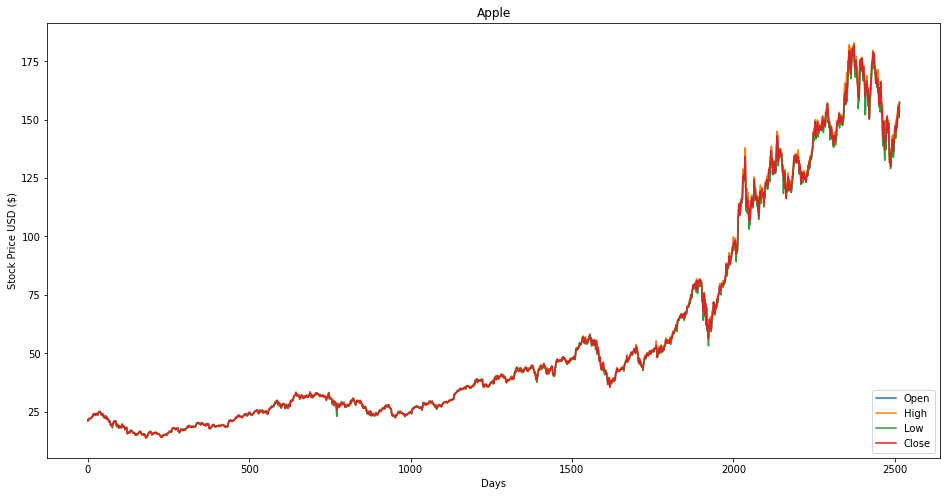

In [11]:
# Visualizing the open, high, low and close prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Stock Price USD ($)')
plt.plot(df['Open'])
plt.plot(df['High'])
plt.plot(df['Low'])
plt.plot(df['Close'])
plt.legend(["Open", "High",'Low','Close'], loc ="lower right")
plt.show()

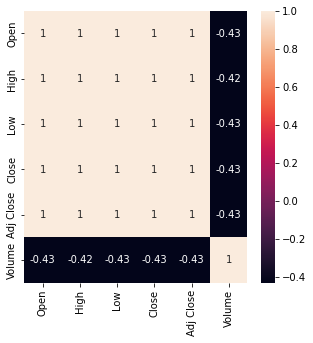

In [12]:
correlation = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlation, annot = True)

In [13]:
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

Text(0.5, 1.0, 'Apple')

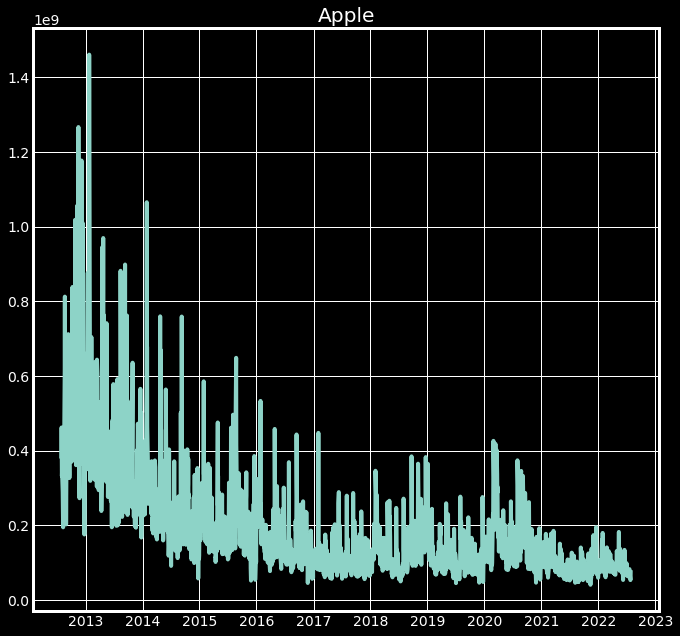

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df['Date'],df['Volume'])
plt.title("Apple")

In [15]:
df2=df.copy()

In [16]:
df2.set_index('Date',inplace=True)

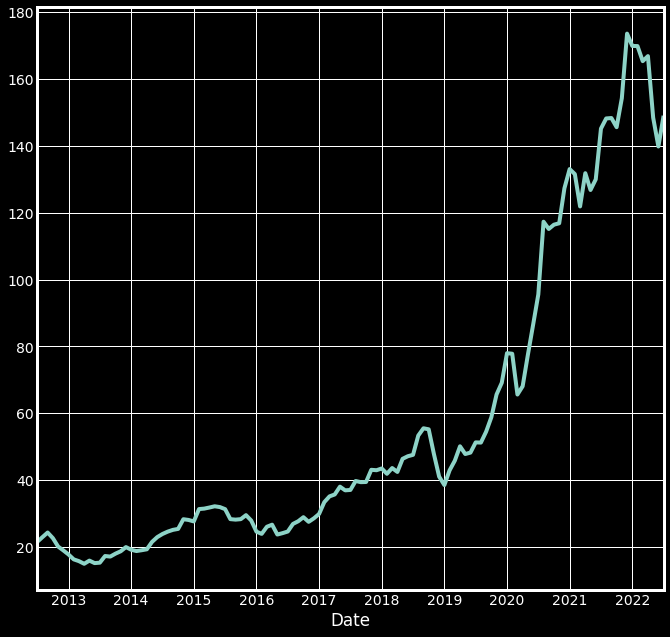

In [17]:
#Resampling close column month wise
plt.figure(figsize=(10,10))
df2['Close'].resample('M').mean().plot()

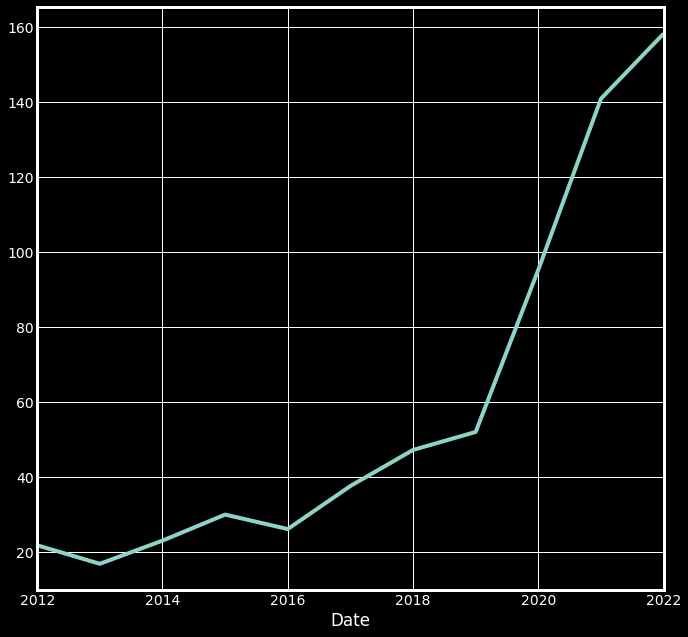

In [18]:
#Resampling close column year wise
plt.figure(figsize=(10,10))
9df2['Close'].resample('Y').mean().plot()

In [19]:
plt.style.use('default') 

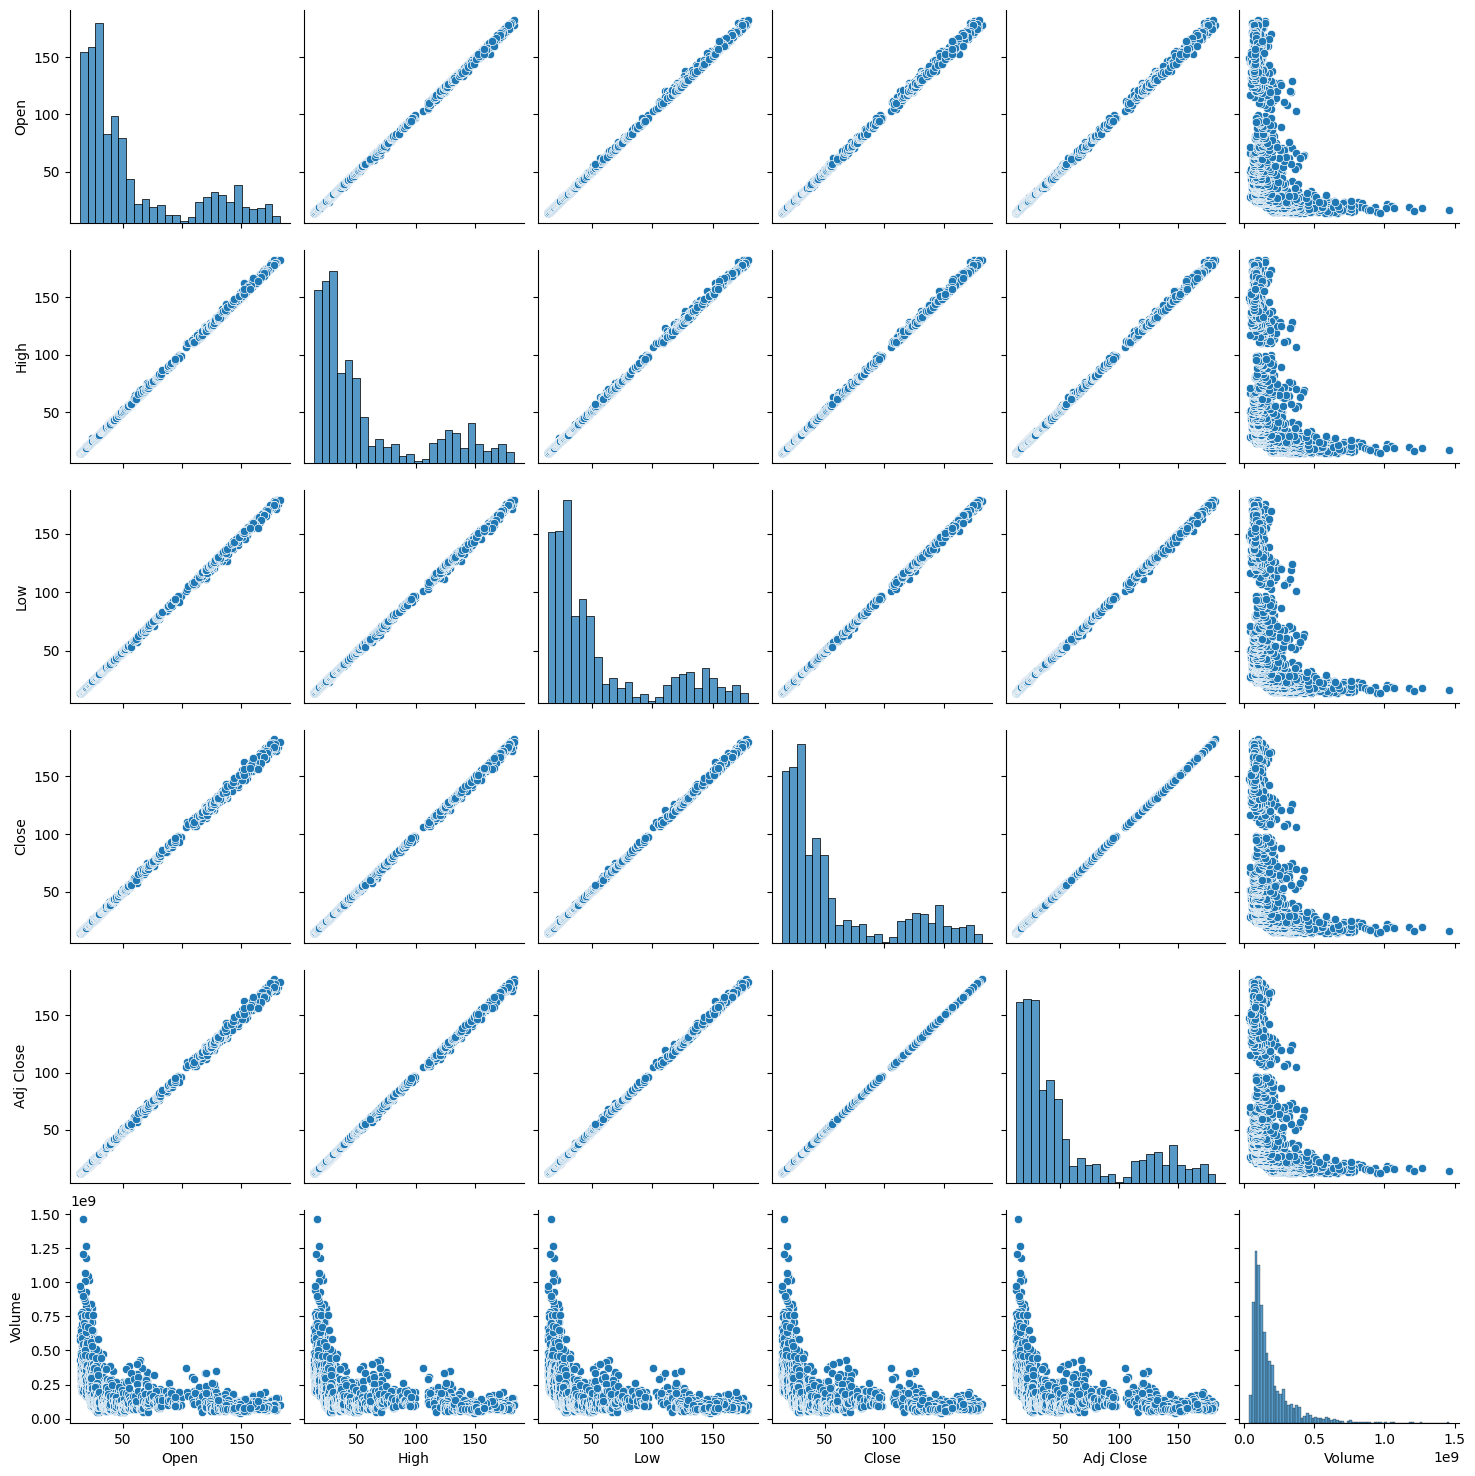

In [20]:
sns.pairplot(data=df2)

SUPPORT VECTOR MACHINE MODELING AND PREDICTION

In [22]:
data=df.copy()

In [23]:
df=df.drop(['Adj Close', 'Volume'], axis=1)

In [24]:
df

,Date,Open,High,Low,Close
0,2012-07-30,21.104286,21.408571,20.993570,21.251072
1,2012-07-31,21.543928,21.846430,21.525715,21.812857
2,2012-08-01,21.996786,22.014286,21.535713,21.671785
3,2012-08-02,21.530001,21.810356,21.437500,21.706785
4,2012-08-03,21.915358,22.070715,21.841429,21.989286
...,...,...,...,...,...
2511,2022-07-22,155.389999,156.279999,153.410004,154.089996
2512,2022-07-25,154.009995,155.039993,152.279999,152.949997
2513,2022-07-26,152.259995,153.089996,150.800003,151.600006
2514,2022-07-27,152.580002,157.330002,152.160004,156.789993


In [25]:
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


In [26]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100
df = df[['High_Low_per','Per_change','Close']]
label_col = 'Close'
forecast_ceil_df = int(math.ceil(0.001*len(df)))
df['label'] = df[label_col].shift(-forecast_ceil_df)

In [27]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil_df:]

In [28]:
df.dropna(inplace=True)

In [29]:
y = np.array(df['label'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
clf = svm.SVR(kernel='rbf')

In [32]:
clf.fit(X_train, y_train) #train

SVR()

In [33]:
y_pred_svm = clf.predict(X_test)

In [34]:
MSE_error_svm = mean_squared_error(y_test, y_pred_svm)
RMSE_svm=np.sqrt(MSE_error_svm)
accuracy_svm=100-RMSE_svm

In [35]:
print(f'The accuracy of stock data using SVM is {accuracy_svm}')

The accuracy of stock data using SVM is 92.21938557458749


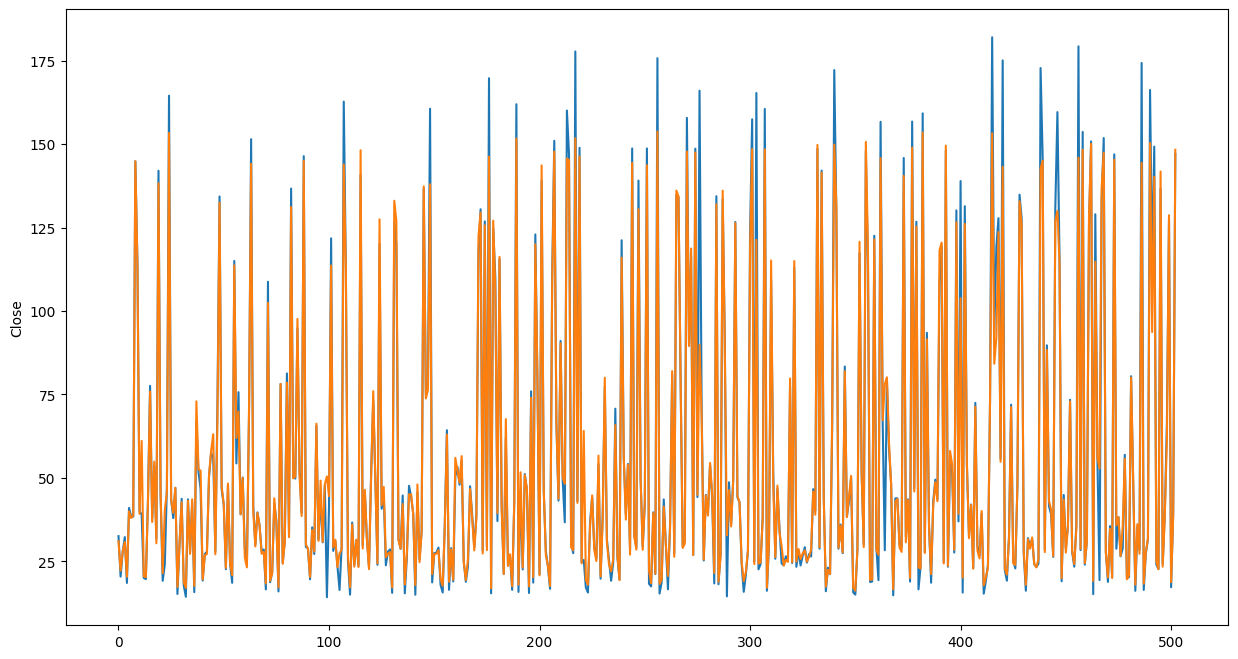

In [36]:
plt.figure(num=None, figsize=(15, 8))
plt.plot(y_test)
plt.plot(y_pred_svm)
plt.ylabel('Close')
plt.show()

ARIMA MODELING AND PREDICTION

In [37]:
def arima_prediction(df,file):
  df=pd.DataFrame(data=df).dropna()
  train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
  train_data = train_data['Close'].values
  test_data = test_data['Close'].values
  stepwise_fit=auto_arima(df['Close'],trace=True,
                        suppress_warnings=True)
  order=stepwise_fit.order
  print(order)
  history = [x for x in train_data]
  model_predictions = []
  N_test_observations_before = len(test_data)
  for time_point in range(N_test_observations_before):
      model_data = ARIMA(history, order=order)
      model_fit = model_data.fit()
      output = model_fit.forecast()
      yhat = output[0]
      model_predictions.append(yhat)
      true_test_value = test_data[time_point]
      history.append(true_test_value)
  MSE_error = mean_squared_error(test_data, model_predictions)


  RMSE_error=np.sqrt(MSE_error)

  accuracy=100-RMSE_error
  file=file.strip(".csv")
 
  test_set_range = df[int(len(df)*0.8):].index
  plt.figure(figsize=[12,10])
  plt.plot(test_set_range, model_predictions, color='green',label='Predicted Price')
  plt.plot(test_set_range, test_data, color='red', label='Actual Price')

  plt.title(f'Prediction for {file} dataset ')
  plt.xlabel('Date')
  plt.ylabel('Prices')
  plt.xticks(np.arange(int(len(df)*0.8),len(df),50), df.Date[int(len(df)*0.8):len(df):50])
  plt.legend()
  print(plt.show())
  return accuracy




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8948.971, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8950.917, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8944.507, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8944.245, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8952.501, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8945.410, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8945.715, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8947.410, Time=2.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8946.300, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.356 seconds
(0, 1, 1)


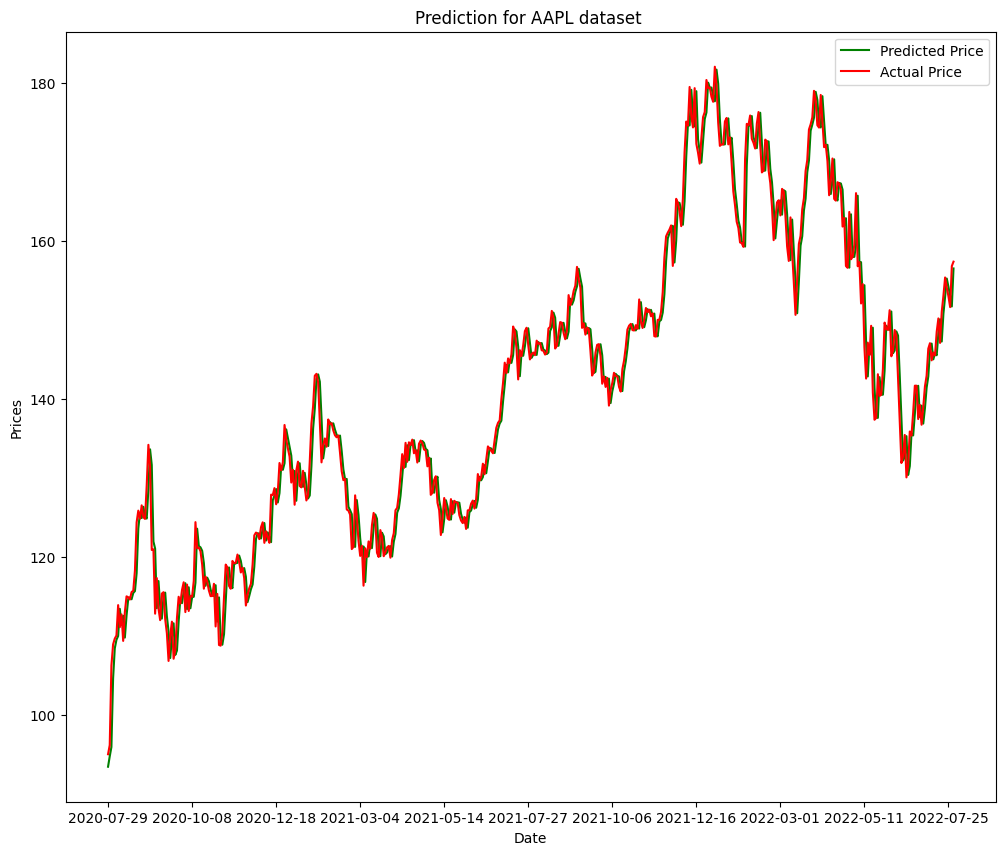

None


In [38]:
for files in os.listdir():
  if files.endswith(".csv"):
    data=pd.read_csv(f'{files}')
    accuracy_arima=arima_prediction(data,files)

LSTM

In [108]:
df = data.filter(['Close'])
dataset = df.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

2013

In [109]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04345748],
       [0.04680019],
       [0.04596079],
       ...,
       [0.81905547],
       [0.84993676],
       [0.85326893]])

In [110]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.04345748, 0.04680019, 0.04596079, 0.04616905, 0.04784997,
       0.04930564, 0.04895713, 0.048734  , 0.04891887, 0.04912501,
       0.05088881, 0.05124794, 0.05106518, 0.0522361 , 0.05473729,
       0.0583584 , 0.05642671, 0.05914891, 0.05782288, 0.05794825,
       0.06059609, 0.06040908, 0.06012644, 0.05808638, 0.05837752,
       0.0604452 , 0.05943793, 0.06072146, 0.06160762, 0.05784626,
       0.05738937, 0.05934441, 0.06214738, 0.06391118, 0.06571748,
       0.06617011, 0.0662105 , 0.06548797, 0.06578335, 0.06380704,
       0.06014132, 0.05836478, 0.06179461, 0.05877279, 0.05713436,
       0.05754237, 0.05969717, 0.05870902, 0.05568932, 0.05262498,
       0.05213197, 0.05320725, 0.05048504, 0.05082718, 0.05190034,
       0.0550943 , 0.05399352, 0.05144983, 0.04660469, 0.05174521])]
[0.04735270650361342]

[array([0.04345748, 0.04680019, 0.04596079, 0.04616905, 0.04784997,
       0.04930564, 0.04895713, 0.048734  , 0.04891887, 0.04912501,
       0.05088881, 0.05124794, 0.05

In [111]:

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 [==============================] - 88s 43ms/step - loss: 3.3475e-04


In [43]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
RMSE_lstm = np.sqrt(np.mean(((predictions - y_test) ** 2)))
RMSE_lstm 
accuracy_lstm=100-RMSE_lstm
print(f'The accuracy of LSTM model for AAPL dataset is {accuracy_lstm}')

The accuracy of LSTM model for AAPL dataset is 90.97805481525634


RNN

In [112]:
rnn_model = Sequential()

In [113]:
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

In [114]:
rnn_model.compile(optimizer="adam",loss="MSE")

In [115]:
rnn_model.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
79/79 [==============================] - 8s 35ms/step - loss: 0.0471
Epoch 2/20
79/79 [==============================] - 3s 34ms/step - loss: 0.0081
Epoch 3/20
79/79 [==============================] - 3s 34ms/step - loss: 0.0040
Epoch 4/20
79/79 [==============================] - 3s 37ms/step - loss: 0.0027
Epoch 5/20
79/79 [==============================] - 3s 38ms/step - loss: 0.0022
Epoch 6/20
79/79 [==============================] - 3s 36ms/step - loss: 0.0018
Epoch 7/20
79/79 [==============================] - 4s 49ms/step - loss: 0.0014
Epoch 8/20
79/79 [==============================] - 3s 36ms/step - loss: 0.0013
Epoch 9/20
79/79 [==============================] - 3s 36ms/step - loss: 0.0012
Epoch 10/20
79/79 [==============================] - 3s 35ms/step - loss: 0.0011
Epoch 11/20
79/79 [==============================] - 3s 37ms/step - loss: 9.4721e-04
Epoch 12/20
79/79 [==============================] - 3s 36ms/step - loss: 8.1576e-04
Epoch 13/20
79/79 [==========

In [116]:

predictions_rnn = rnn_model.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)
RMSE_rnn = np.sqrt(np.mean(((predictions_rnn - y_test) ** 2)))
RMSE_rnn 
accuracy_rnn=100-RMSE_rnn
print(f'The accuracy of RNN model for AAPL dataset is {accuracy_rnn}')

The accuracy of RNN model for AAPL dataset is 85.79621982906822


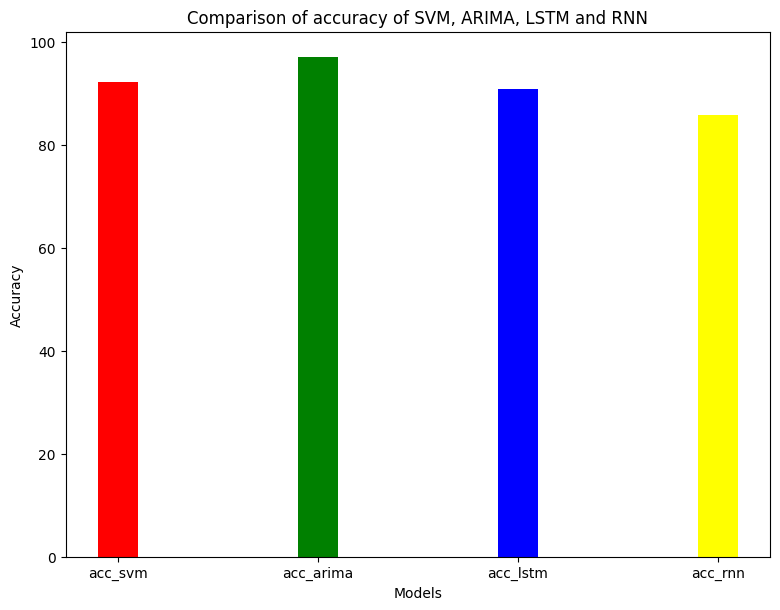

In [117]:

plt.figure(figsize=(20,15))

left_acc = [1,2,3,4]

height_acc = [accuracy_svm,accuracy_arima,accuracy_lstm, accuracy_rnn]


tick_label_acc = ['acc_svm', 'acc_arima','acc_lstm','acc_rnn']

plt.subplot(2,2,1);plt.bar(left_acc, height_acc,tick_label=tick_label_acc,width=0.2, color = ['red', 'green','blue','yellow']	);plt.xlabel("Models");plt.ylabel('Accuracy');plt.title('Comparison of accuracy of SVM, ARIMA, LSTM and RNN')

plt.show()





